In [167]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot

In [12]:
파일위치경로 = r'C:/Users/user/Desktop/구청별 업무추진비(엑셀)/'
구청목록 = [ 
    '종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구',
    '은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구',
    '강남구','송파구','강동구','서울특별시'
            ]   #26개

## 구청별 박스플롯 비교

In [65]:
극단값제거 = 500000

In [250]:
구청별금액사전=dict()
for 구청이름 in 구청목록:
    try:
        구청금액 = pd.read_excel(파일위치경로+구청이름+'.xlsx',index_col='연번').집행금액
        구청금액.columns =구청이름
        try:
            구청금액 = 구청금액.astype(str).apply(lambda x : x.replace(',','').replace(' ','')).astype(np.int64)
        except AttributeError:
            pass
        #구청금액 = 구청금액[구청금액<극단값제거].reset_index(drop=True)
        구청별금액사전[구청이름] = 구청금액
    except FileNotFoundError:
        pass
    except :
        print(구청이름)

In [251]:
구청별금액프레임 =pd.DataFrame()
구청식별코드 = dict()
for count,구청이름 in enumerate(구청목록):
    try:
        구청별금액프레임[str(count)] = 구청별금액사전[구청이름]
        구청식별코드[str(count)] = 구청이름
    except:
        pass

<IPython.core.display.Javascript object>


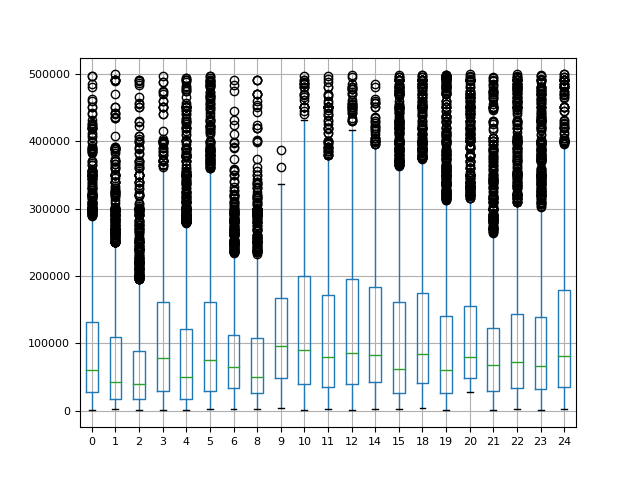

In [255]:
구청별금액프레임.boxplot(fontsize=8)

In [256]:
구청식별코드['9']

'도봉구'

## 구청별 기초통계 & 히스토그램